Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Functions Used

In [77]:
def categorial_to_numerical(data):

    if data[1] == 'male':
        data[1] = 1
    else: data[1] = 0

    if data[4] == 'yes':
        data[4] = 1
    else: data[4] = 0

    if data[5] == 'northeast':
        data[5] = 0
    elif data[5] == 'northwest':
        data[5] = 1
    elif data[5] == 'southeast':
        data[5] = 2
    elif data[5] == 'southwest':
        data[5] = 3
    return data

## Data Collection & Analysis

In [2]:
# Loading the data
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Number of rows and columns
insurance_data.shape

(1338, 7)

In [4]:
# Getting info about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

* Sex
* Smoker
* Region

In [5]:
# Checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


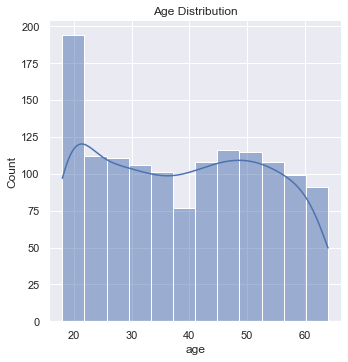

In [7]:
# Distribution of age value
sns.set()
plt.Figure(figsize=(6,6))
sns.displot(insurance_data['age'], kde=True)
plt.title('Age Distribution')
plt.show()


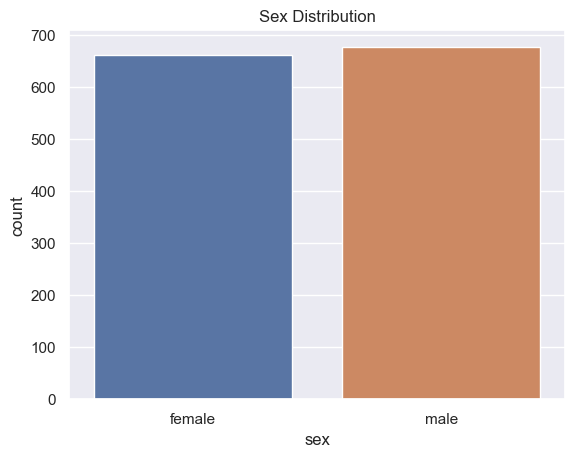

In [8]:
# Sex feature
plt.Figure(figsize=(6,6))
sns.countplot(data=insurance_data, x='sex')
plt.title('Sex Distribution')
plt.show()


In [9]:
insurance_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

c:\Users\romay\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


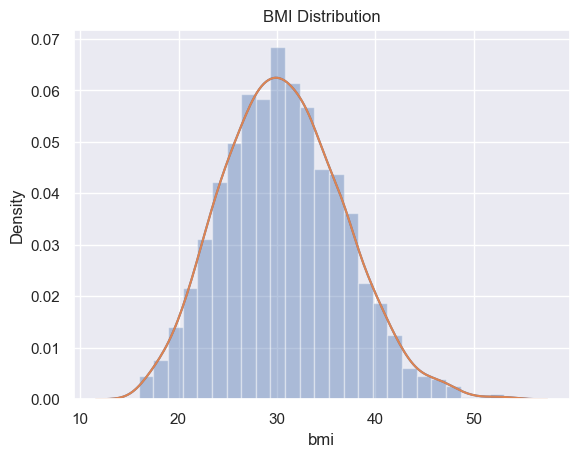

In [10]:
# BMI Distribution

plt.Figure(figsize=(6,6))
ax = sns.distplot(insurance_data['bmi'])
sns.kdeplot(data=insurance_data, x='bmi', ax=ax)
plt.title('BMI Distribution')
plt.show()

Normal BMI Range--> 18.5 to 24.9

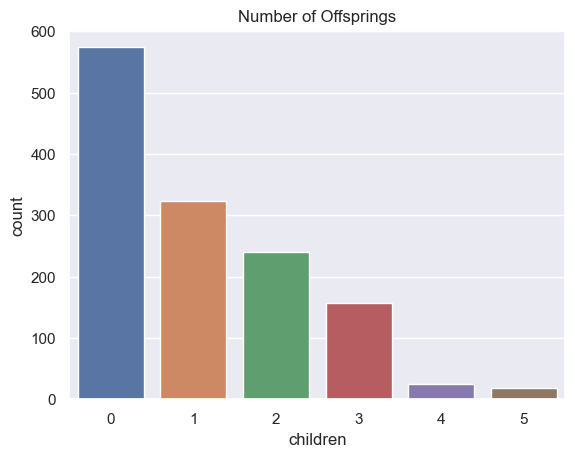

In [11]:
# Children Feature
plt.Figure(figsize=(6,6))
sns.countplot(data=insurance_data, x='children')
plt.title('Number of Offsprings')
plt.show()

In [12]:
insurance_data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

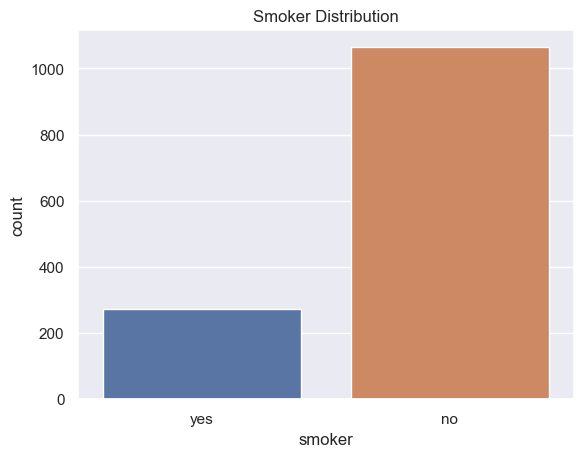

In [13]:
# Smoker Distributiom
plt.Figure(figsize=(6,6))
sns.countplot(data=insurance_data, x='smoker')
plt.title('Smoker Distribution')
plt.show()

In [14]:
insurance_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

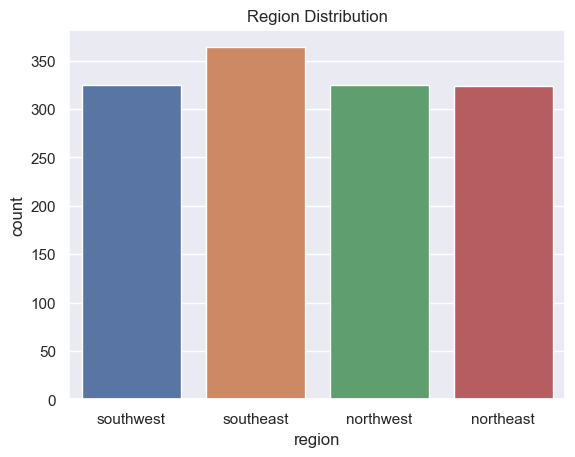

In [15]:
# Region Distributiom
plt.Figure(figsize=(6,6))
sns.countplot(data=insurance_data, x='region')
plt.title('Region Distribution')
plt.show()

In [16]:
insurance_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\Users\romay\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


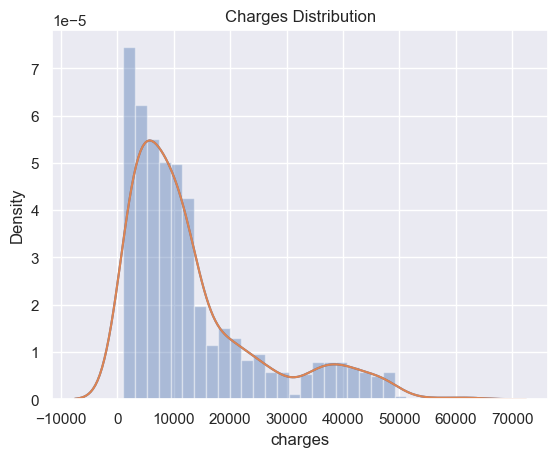

In [17]:
# Charges Distribution

plt.Figure(figsize=(6,6))
ax = sns.distplot(insurance_data['charges'])
sns.kdeplot(data=insurance_data, x='charges', ax=ax)
plt.title('Charges Distribution')
plt.show()

## Model Building

In [22]:
# Getting model features
X = insurance_data.iloc[:,0:6].values
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [23]:
insurance_data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male','female'])
X[:,1] = le_sex.transform(X[:,1])

le_smoker = preprocessing.LabelEncoder()
le_smoker.fit(['no','yes'])
X[:,4] = le_smoker.transform(X[:,4])

le_region = preprocessing.LabelEncoder()
le_region.fit(['southwest', 'southeast', 'northwest', 'northeast'])
X[:,5] = le_region.transform(X[:,5])

Note: region encoded from 0 to 3 in alphabetical order

So, 
* northeast --> 0
* northwest --> 1
* southeast --> 2
* southwest --> 3

In [38]:
# Getting target data
Y = insurance_data.iloc[:, 6:7].values

Splitting data in training data and testing data

In [55]:
X

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

* Linear Regression

In [49]:
# Initialize linear regression model
regressor = LinearRegression()

In [50]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [51]:
# Prediction on training data

training_data_prediction = regressor.predict(X_train)

In [52]:
# R Squared Value
R2_train = metrics.r2_score(Y_train, training_data_prediction)

print('R Squared value: ', R2_train)

R Squared value:  0.7519923667088932


In [53]:
# Prediction on training data

test_data_prediction = regressor.predict(X_test)

In [54]:
# R Squared Value
R2_test = metrics.r2_score(Y_test, test_data_prediction)

print('R Squared value: ', R2_test)

R Squared value:  0.7445422986536503


## Building a Predictive System

In [100]:
input_data = [31,'female',25.74,0,'no','southeast']

One hot encoding data with predefined function & converting to numpy array

In [101]:
# One-Hot Encoding Data
data_modified = categorial_to_numerical(input_data)

# Changing modified data to Numpy array
data_modified_as_numpy_array = np.asarray(data_modified)

# Reshapiing modified input data/
data_reshaped = data_modified_as_numpy_array.reshape(1,-1)

In [102]:
# Finding the prediction

prediction = regressor.predict(data_reshaped)
print('Est. Medical Insurance Cost (USD): ', prediction[0][0])

Est. Medical Insurance Cost (USD):  3911.448161400358
